In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


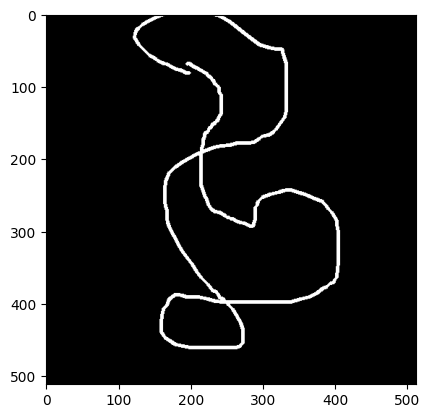

In [5]:
img = np.zeros((512,512,3))
drawing = False
ix = 0
iy = 0

def draw(event, x, y, flags, params):
    global ix, iy, drawing
    
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix = x
        iy = y
    if event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            cv.line(img, pt1 = (ix, iy), pt2=(x,y), color=(255,255,255), thickness=3)
            ix = x
            iy = y
    if event == cv.EVENT_LBUTTONUP:
        drawing = False
        
cv.namedWindow("Window")
cv.setMouseCallback("Window", draw)

while True:
    cv.imshow("Window", img)
    if cv.waitKey(1)  & 0xFF == 27:
        break
        
cv.destroyAllWindows()
plt.imshow(img[...,::-1])

In [ ]:
drawing = False
start_point = (0,0)

def draw_rectangle(event, x, y, flags, param):
    global start_point, drawing
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        start_point = x, y
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing == True:
            cv.rectangle(img, start_point, (x, y), (0, 255, 0), -1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        
img = np.zeros((512,512,3), 'uint8')
cv.namedWindow('image')
cv.setMouseCallback('image', draw_rectangle)

while True:
    cv.imshow('image', img)
    if cv.waitKey(1) & 0xFF == 27:
        break
cv.destroyAllWindows()
plt.imshow(img[...,::-1])

[[(728, 153), (728, 153)], [(561, 250), (287, 406)]]


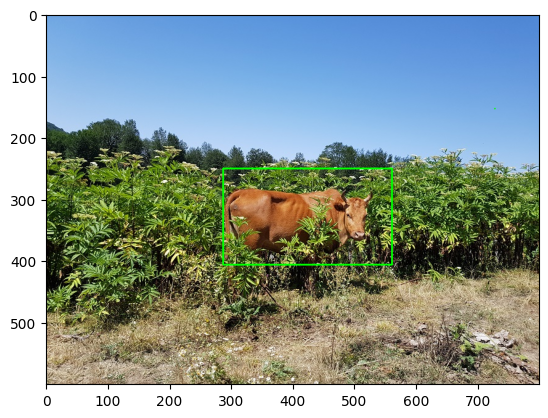

In [2]:
drawing = False
start_point = (0,0)
points = []

def draw_empty_rectangle(event, x, y, flags, param):
    global start_point, drawing, points
    if event == cv.EVENT_LBUTTONDOWN:
        start_point = (x, y)
    elif event == cv.EVENT_LBUTTONUP:
        points.append([start_point, (x, y)])
        cv.rectangle(image, start_point, (x, y), (0, 255, 0), 2)
        cv.imshow("image", image)
        
image = cv.imread(r"D:\Opencv\class.vision-master\images\input.jpg", cv.IMREAD_UNCHANGED)
clone = image.copy()
cv.namedWindow('image')
cv.setMouseCallback('image', draw_empty_rectangle)

while True:
    cv.imshow('image', image)
    key = cv.waitKey(1) & 0xFF
    if key == ord('r'):
        image = clone.copy()
        points = []
    elif key == 27:
        break

cv.destroyAllWindows()
plt.imshow(image[...,::-1])
print(points)